### Wstęp do Uczenia Maszynowego 
##### Laboratorium 2

### 1. Podstawy drzew decyzyjnych - klasyfikacja

In [52]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split


### Kryterium podziału
a) wskaźnik błędu klasyfikacji (*classification error rate*) = udział obserwacji ze zbioru treningowego w danym regionie, które nie należą do przeważającej klasy.

$$E = 1 - max_{k}(\hat{p}_{mk}) $$

$\hat{p}_{mk}$ - proporcja obserwacji zbioru treningowego w m-tym regionie pochodząca z k-tej klasy

b) indeks Giniego

$$G = \sum_{k=1}^{K}\hat{p}_{mk}(1-\hat{p}_{mk})$$
Indeks Giniego przyjmuje małe wartości jeżeli $\hat{p}_{mk}$ jest bliski 0 lub 1. Z tego powodu indeks Giniego jest określany jako miara czystości węzła (*node purity*) - mała wartość wskazuje, że węzeł zawiera głównie obserwacje z jednej klasy.

c) entropia

$$D = - \sum_{k=1}^{K}\hat{p}_{mk}log\hat{p}_{mk}$$

$0 \leq \hat{p}_{mk} \leq 1 \ \rightarrow 0 \leq -\hat{p}_{mk}log\hat{p}_{mk}$

Podobnie jak indeks Giniego przyjmuje małe wartości (bliskie zero) gdy $\hat{p}_{mk}$ jest bliskie 0 lub 1.

Dokumentacja:
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [53]:
pima = pd.read_csv("pima.csv")

##### *Zadanie 1*
------------------------

Przygotuj zbiór danych `pima` do dalszej pracy. Podziel na *X* i *y*, a następnie na zbiór treningowy i testowy w proporcji 7:3.

In [54]:
pima
y = pima.Outcome
X = pima.drop(["Outcome"], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

##### *Zadanie 2*
---------------
Zbuduj model drzewa dla danych z *Zadania 1*.

In [56]:
Tree = tree.DecisionTreeClassifier()
Tree = Tree.fit(X_train, y_train)

#### Macierz pomyłek (*ang. confusion matrix*)

<img src="confusion_matrix.png"  width="500"/>

In [57]:
from sklearn.metrics import confusion_matrix

##### *Zadanie 3*
-----------------
Wyznacz macierz pomyłek dla predykcji na danych treningowych.

In [58]:
y_pred_train = Tree.predict(X_train)

In [59]:
confusion_matrix(y_train, y_pred_train)


array([[351,   0],
       [  0, 186]], dtype=int64)

Jak odczytać powstałą macierz pomyłek w pakiecie `scikit-learn`?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html 


In [ ]:
# tp, fp, fn, tn = ?

In [60]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
(tn, fp, fn, tp)

(351, 0, 0, 186)

Dla danych testowych

In [61]:
y_pred_test = Tree.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[123,  26],
       [ 41,  41]], dtype=int64)

##### *Zadanie 4*
-------------
Policz następujące miary dla otrzymanych predykcji na zbiorze treningowym.

a) dokładność (*accuracy*)

b) czułość (*sensitivity, recall*)

c) precyzja (*precision*)

d) F1-score 

Powtórz obliczenia dla zbioru testowego.

Zbiór treningowy

In [62]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
(tn, fp, fn, tp)

(351, 0, 0, 186)

In [63]:
# a)
(tp + tn)/X_train.shape[0]

1.0

In [64]:
# b)
tp/(tp + fn)

1.0

In [65]:
# c)
tp/(tp + fp)


1.0

In [66]:
# d)
2*tp/(2*tp + fp + fn)

1.0

Zbiór testowy

In [67]:
y_pred_test = Tree.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print("accuracy:", accuracy_score(y_test, y_pred_test))
print("recall:", recall_score(y_test, y_pred_test))
print("precision:", precision_score(y_test, y_pred_test))
print("f1 score:", precision_score(y_test, y_pred_test))

accuracy: 0.70995670995671
recall: 0.5
precision: 0.6119402985074627
f1 score: 0.6119402985074627


### Zbiór walidaycjny?

##### *Zadanie 5*
-------------
Podziel zbiór `pima` na zbiór treningowy, walidacyjny i testowy (6:2:2).

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25)

In [81]:
Tree = tree.DecisionTreeClassifier(random_state=0)
path = Tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [82]:
ccp_alphas

array([0.        , 0.00232919, 0.00232919, 0.00241546, 0.00250836,
       0.00263112, 0.00349379, 0.00362319, 0.00362319, 0.00362319,
       0.00362319, 0.0039339 , 0.00407609, 0.00414079, 0.00430005,
       0.00434783, 0.00475543, 0.00478261, 0.0047955 , 0.00493057,
       0.00498188, 0.00503221, 0.00507246, 0.00524068, 0.00524068,
       0.00569272, 0.00621118, 0.00630823, 0.00682317, 0.00697223,
       0.00779958, 0.00787751, 0.00913235, 0.01125419, 0.01189065,
       0.01454076, 0.01983539, 0.10363325])

In [83]:
clfs = []
for ccp_alpha in ccp_alphas:
    Tree = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    Tree.fit(X_train, y_train)
    clfs.append(Tree)


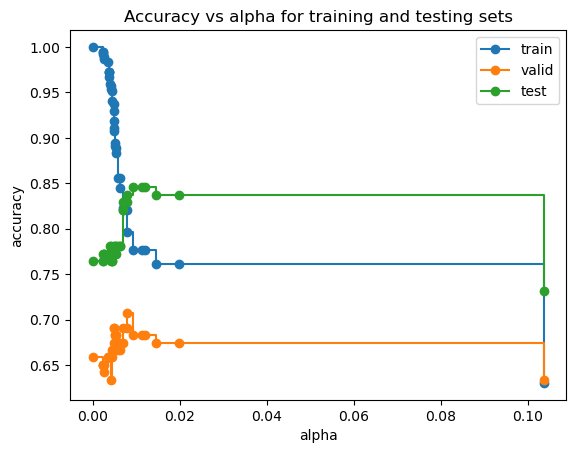

In [84]:
import matplotlib.pyplot as plt
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker="o", label="valid", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [85]:
alpha_opt = max(ccp_alphas[valid_scores==np.max(valid_scores)])

In [86]:
alpha_opt

0.00787751285647499

In [87]:
X = np.concatenate((X_train, X_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0) 
clf = tree.DecisionTreeClassifier(random_state=123, ccp_alpha=alpha_opt) 
clf = clf.fit(X, y) 

In [88]:
clf.score(X_test, y_test) 

0.8617886178861789